<a href="https://colab.research.google.com/github/Vaibhav543/Applied_AI/blob/main/Predict_Fradulent_Transactions_Voting_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required modules
import csv
import sqlite3
import pandas as pd



# Connecting to the geeks database
connection = sqlite3.connect('ml.db')

# Creating a cursor object to execute
# SQL queries on a database table
cursor = connection.cursor()

# Table Definition
Create_Transactions = '''CREATE TABLE Transactions(
        TID INTEGER,
        IdOfOrigStudent INTEGER,
        IdOfDestStudent INTEGER,
        transactionType TEXT,
        hourStep INTEGER,
        transaction_device TEXT,
				comments TEXT);
				'''

Create_Students = '''CREATE TABLE Students(
        StudentId INTEGER,
        StudentName TEXT,
        StudentAge INTEGER,
        StudentYear INTEGER,
        TransactionFrequency TEXT,
        NumberOfTransactionsTillDate INTEGER,
        AccountType TEXT);
				'''
Create_Sender= '''CREATE TABLE Sender(
        oldBalanceOfOrigStudent INTEGER,
        newBalanceOfOrigStudent INTEGER,
        transactionAmount INTEGER,
        TID INTEGER);
				'''
Create_Receiver= '''CREATE TABLE Receiver(
        oldBalanceOfDestStudent INTEGER,
        newBalanceOfDestStudent INTEGER,
        transactionAmount INTEGER,
        TID INTEGER);
	'''
Create_Processed_Hacker_Check= '''CREATE TABLE Processed_Hacker_Check(
        TID INTEGER,
        isSuspectedHacker INTEGER,
        isHacker INTEGER);'''

Create_Unprocessed_Hacker_Check='''CREATE TABLE Unprocessed_Hacker_Check(
        TID INTEGER,
        isSuspectedHacker INTEGER);
        '''


# Creating the table into our database. Dont Run again if relation is already created.
cursor.execute(Create_Transactions)
#cursor.execute("DROP TABLE Processed_Hacker_Check")
cursor.execute(Create_Processed_Hacker_Check)
cursor.execute(Create_Students)
cursor.execute(Create_Sender)
cursor.execute(Create_Receiver)
cursor.execute(Create_Unprocessed_Hacker_Check)

##

# Opening the person-records.csv file
Transactions_file = open('/content/drive/MyDrive/ADS_DataSet/Transactions.csv')
#Processed_Hacker_Check_file = open('/content/Processed_Hacker_Check.csv')
Students_file = open('/content/drive/MyDrive/ADS_DataSet/Students.csv')
Sender_file = open('/content/drive/MyDrive/ADS_DataSet/sender.csv')
Receiver_file = open('/content/drive/MyDrive/ADS_DataSet/receiver.csv')



# Reading the contents of the
# person-records.csv file
Transactions_contents = csv.reader(Transactions_file)
#Processed_Hacker_Check_file_contents = csv.reader(Processed_Hacker_Check_file)
Students_contents = csv.reader(Students_file)
Sender_contents = csv.reader(Sender_file)
Receiver_contents = csv.reader(Receiver_file)


# SQL query to insert data into the
# person table
insert_Transactions = "INSERT INTO Transactions (TID, IdOfOrigStudent,IdOfDestStudent,transactionType,hourStep,transaction_device,comments) VALUES(?,?,?,?,?,?,?) "
insert_Processed_Hacker_Check="INSERT INTO Processed_Hacker_Check (TID, isSuspectedHacker,isHacker) VALUES(?,?,?)"
insert_Students="INSERT INTO Students (StudentId, StudentName,StudentAge,StudentYear,TransactionFrequency,NumberOfTransactionsTillDate,AccountType) VALUES(?,?,?,?,?,?,?)"
insert_Sender="INSERT INTO Sender (oldBalanceOfOrigStudent, newBalanceOfOrigStudent,transactionAmount,TID) VALUES(?,?,?,?)"
insert_Receiver="INSERT INTO Receiver (oldBalanceOfDestStudent, newBalanceOfDestStudent,transactionAmount,TID) VALUES(?,?,?,?)"



# Importing the contents of the file
# into our person table
cursor.executemany(insert_Transactions, Transactions_contents)
#cursor.executemany(insert_Processed_Hacker_Check, Processed_Hacker_Check_file_contents)
cursor.executemany(insert_Students, Students_contents)
cursor.executemany(insert_Sender, Sender_contents)
cursor.executemany(insert_Receiver, Receiver_contents)


# SQL query to retrieve all data from
# the person table To verify that the
# data of the csv file has been successfully
# inserted into the table
select_all = "SELECT * FROM Transactions LIMIT 5"
rows = cursor.execute(select_all).fetchall()

# Output to the console screen
for r in rows:
	print(r)

# Committing the changes
connection.commit()

# closing the database connection
#connection.close()


('TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'transactionType', 'hourStep', 'transaction_device', 'comments')
(2599764, 'C1218556612', 'M1579714126', 'money payment', 373, 'Net Banking', 'Done at super market.')
(1476902, 'C1449172216', 'C639646553', 'cash outflow', 353, 'ATM card', 'eatables')
(2537234, 'C603557670', 'M324744640', 'money payment', 8, 'Check', 'Purchased groceries')
(1868301, 'C1336875098', 'C1698810627', 'cash outflow', 346, 'Net Banking', 'Purchased groceries')


In [3]:
import openpyxl

insert_Processed_Hacker_Check="INSERT INTO Processed_Hacker_Check (TID, isSuspectedHacker,isHacker) VALUES(?,?,?)"
insert_Unprocessed_Hacker_Check="INSERT INTO Unprocessed_Hacker_Check (TID, isSuspectedHacker) VALUES(?,?)"



def importExcelWorkBookIntoDB(worksheetPath,insertQuery,columnCount):
    """ Test for case study 1. """
    # Open the database connection and the Excel file
    with sqlite3.connect('ml.db', timeout=20) as db:
        cursor = db.cursor()
        #cursor.execute("DROP TABLE Processed_Hacker_Check")
        #cursor.execute(Create_Processed_Hacker_Check_)
        ##db.commit()

        ##workbook=openpyxl.load_workbook('/content/drive/MyDrive/ADS_DataSet/Processed_Hacker_Check.xlsx')
        workbook=openpyxl.load_workbook(worksheetPath)
        # Access a specific sheet by name
        sheet = workbook['Sheet1']
        ##insert_Processed_Hacker_Check="INSERT INTO Processed_Hacker_Check (TID, isSuspectedHacker,isHacker) VALUES(?,?,?)"


        # Clear the database
        #db.execute('DELETE FROM albums;')

        # Load data from each Excel sheet into the database
        # Iterate through rows and columns to read data
        for row in sheet.iter_rows(values_only=True):
         try:
              if columnCount==3:
               cursor.execute(insert_Processed_Hacker_Check, (str(row[0]),str(row[1]),str(row[2])))
              elif columnCount==2:
               cursor.execute(insert_Unprocessed_Hacker_Check, (str(row[0]),str(row[1])))

              #cursor.execute(insert_Processed_Hacker_Check, row[0]),str(row[1]),str(row[2])))
              #cursor.executemany(insertQuery,sheet.iter_rows())
         except sqlite3.Error as e:
                print(e)
                db.rollback()

        db.commit()



importExcelWorkBookIntoDB("/content/drive/MyDrive/ADS_DataSet/Processed_Hacker_Check.xlsx",insert_Processed_Hacker_Check,3)
importExcelWorkBookIntoDB("/content/drive/MyDrive/ADS_DataSet/Unprocessed_Hacker_Check.xlsx",insert_Unprocessed_Hacker_Check,2)



In [6]:
# Check if all data have been loaded
select_stmt = 'SELECT COUNT(*) FROM Unprocessed_Hacker_Check'
for row in cursor.execute(select_stmt).fetchall():
   print(row)

(419432,)


In [4]:
#SELECT Transactions.TID,IdOfOrigStudent,IdOfDestStudent,hourStep,transaction_device,comments,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,oldBalanceOfDestStudent,newBalanceOfDestStudent	,receiver.transactionAmount ,isSuspectedHacker,isHacker

display = pd.read_sql_query("""
SELECT Transactions.TID,IdOfOrigStudent,IdOfDestStudent,hourStep,transaction_device,comments,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,oldBalanceOfDestStudent,newBalanceOfDestStudent,receiver.transactionAmount ,OrigStud.StudentAge as OriginStudentAge,OrigStud.TransactionFrequency as OriginStudentTransactionFrequency,OrigStud.NumberOfTransactionsTillDate as OriginStudentNumberOfTransactionsTillDate,OrigStud.AccountType as OriginStudentAccountType,DestStud.StudentAge as DestStudentAge,DestStud.TransactionFrequency as DestStudentTransactionFrequency,DestStud.NumberOfTransactionsTillDate as DestStudentNumberOfTransactionsTillDate,DestStud.AccountType as DestStudentAccountType,isSuspectedHacker,isHacker
FROM Transactions
JOIN sender on sender.TID=Transactions.TID
JOIN receiver on receiver.TID=Transactions.TID
JOIN Processed_Hacker_Check on Processed_Hacker_Check.TID=Transactions.TID
JOIN Students as OrigStud on OrigStud.StudentId=Transactions.IdOfOrigStudent
JOIN Students as DestStud on DestStud.StudentId=Transactions.IdOfDestStudent
ORDER BY Transactions.TID""", connection)

display

TID IdOfOrigStudent IdOfDestStudent  hourStep transaction_device  \
0       1400834      C606683033     M1233701161       359        Net Banking   
1       1400835     C1704865025      C838394820       275              Check   
2       1400837      C677492872       M58665846       165           ATM card   
3       1400849      C479781417     M1160048007       135                UPI   
4       1400851     C1295464164     C1430644285       353                UPI   
...         ...             ...             ...       ...                ...   
337185  2090138      C421795611     M1731522434        45        Net Banking   
337186  2090139     C1555454279       M68798940       349              Check   
337187  2090140      C720066039      C178506784        34                UPI   
337188  2090143      C843852585      M216128171        18              Check   
337189  2090144     C1065467871     C1027610336       544              Check   

                    comments  oldBalanceOfOrigStudent  \
0                     dinner                   6063.0   
1                       loan                 148046.0   
2                       food                      0.0   
3                    betting                  36565.0   
4                  breakfast                  11986.0   
...                      ...                      ...   
337185               betting                      0.0   
337186  purchased stationary                      0.0   
337187   Purchased groceries                  11067.0   
337188              eatables                      0.0   
337189                dinner                  10746.0   

        newBalanceOfOrigStudent  oldBalanceOfDestStudent  \
0                       1225.24                     0.00   
1                          0.00               6042820.87   
2                          0.00                     0.00   
3                      28665.72                     0.00   
4                       9787.75                265752.32   
...                         ...                      ...   
337185                     0.00                     0.00   
337186                     0.00                     0.00   
337187                     0.00                221592.30   
337188                     0.00                     0.00   
337189                     0.00               1095470.78   

        newBalanceOfDestStudent  ...  OriginStudentAge  \
0                          0.00  ...                29   
1                    6285298.91  ...                15   
2                          0.00  ...                23   
3                          0.00  ...                15   
4                     267950.57  ...                19   
...                         ...  ...               ...   
337185                     0.00  ...                21   
337186                     0.00  ...                22   
337187                168355.76  ...                13   
337188                     0.00  ...                12   
337189               1172071.73  ...                14   

        OriginStudentTransactionFrequency  \
0                                     LOW   
1                                  MEDIUM   
2                                  MEDIUM   
3                                    HIGH   
4                                     LOW   
...                                   ...   
337185                               HIGH   
337186                             MEDIUM   
337187                               HIGH   
337188                               HIGH   
337189                             MEDIUM   

       OriginStudentNumberOfTransactionsTillDate  OriginStudentAccountType  \
0                                            930                INDIVIDUAL   
1                                            328                INDIVIDUAL   
2                                            801                INDIVIDUAL   
3                                            565                INDIVIDUAL   
4                

In [6]:
#display=display.drop("isSuspectedHacker",axis=1)

#display.drop(index=0,inplace=True)
#display.drop(display[display['TID'].is].index,inplace=True)

print(display.shape)


(337190, 21)


In [5]:

# save the labels into a variable l.
#label = pd.DataFrame(display['isHacker'],columns=('isHacker'))
#label=pd.read_sql_query("""Select  isHacker FROM Transactions
#JOIN Processed_Hacker_Check on Processed_Hacker_Check.TID=Transactions.TID""", connection)
# Drop the label feature and store the pixel data in d.
data = display.drop("isHacker",axis=1)
label=display.filter(["isHacker"], axis=1)
print(data.shape)
print(label.shape)
#label.drop(index=0,inplace=True)

(337190, 20)
(337190, 1)


In [96]:
print(display.dtypes)

TID                                            int64
IdOfOrigStudent                               object
IdOfDestStudent                               object
hourStep                                       int64
transaction_device                            object
comments                                      object
oldBalanceOfOrigStudent                      float64
newBalanceOfOrigStudent                      float64
oldBalanceOfDestStudent                      float64
newBalanceOfDestStudent                      float64
transactionAmount                            float64
OriginStudentAge                               int64
OriginStudentTransactionFrequency             object
OriginStudentNumberOfTransactionsTillDate      int64
OriginStudentAccountType                      object
DestStudentAge                                 int64
DestStudentTransactionFrequency               object
DestStudentNumberOfTransactionsTillDate        int64
DestStudentAccountType                        

In [ ]:

print(display.columns)
print("**********************************************************************************************")
print(display.nunique())
print("***********************************************************************************************")
print(display['isHacker'].value_counts())


#This is a highly imbalanced dataset as the number of data points for Hacked Transactions are very less.

In [98]:
display.isnull().sum()

TID                                          0
IdOfOrigStudent                              0
IdOfDestStudent                              0
hourStep                                     0
transaction_device                           0
comments                                     0
oldBalanceOfOrigStudent                      0
newBalanceOfOrigStudent                      0
oldBalanceOfDestStudent                      0
newBalanceOfDestStudent                      0
transactionAmount                            0
OriginStudentAge                             0
OriginStudentTransactionFrequency            0
OriginStudentNumberOfTransactionsTillDate    0
OriginStudentAccountType                     0
DestStudentAge                               0
DestStudentTransactionFrequency              0
DestStudentNumberOfTransactionsTillDate      0
DestStudentAccountType                       0
isSuspectedHacker                            0
isHacker                                     0
dtype: int64

In [99]:
numerical_attributes = display.select_dtypes(exclude='object')
categorical_attributes = display.select_dtypes(include='object')

describe = numerical_attributes.describe()

describe

TID       hourStep  oldBalanceOfOrigStudent  \
count  3.371900e+05  337190.000000             3.371900e+05   
mean   1.745262e+06     244.105614             9.099317e+05   
std    1.989359e+05     143.162522             3.005166e+06   
min    1.400834e+06       1.000000             0.000000e+00   
25%    1.572508e+06     156.000000             0.000000e+00   
50%    1.745350e+06     240.000000             1.658232e+04   
75%    1.917782e+06     336.000000             1.287140e+05   
max    2.090144e+06     743.000000             5.039905e+07   

       newBalanceOfOrigStudent  oldBalanceOfDestStudent  \
count             3.371900e+05             3.371900e+05   
mean              9.298745e+05             1.046370e+06   
std               3.035718e+06             3.394481e+06   
min               0.000000e+00             0.000000e+00   
25%               0.000000e+00             0.000000e+00   
50%               0.000000e+00             8.523935e+04   
75%               1.791346e+05             8.609687e+05   
max               4.039905e+07             3.555534e+08   

       newBalanceOfDestStudent  transactionAmount  OriginStudentAge  \
count             3.371900e+05       3.371900e+05     337190.000000   
mean              1.151664e+06       1.714482e+05         19.504629   
std               3.617401e+06       5.645841e+05          5.760074   
min               0.000000e+00       0.000000e+00         10.000000   
25%               0.000000e+00       1.203223e+04         15.000000   
50%               1.511457e+05       6.409780e+04         20.000000   
75%               1.003902e+06       1.997636e+05         24.000000   
max               3.553814e+08       4.846478e+07         29.000000   

       OriginStudentNumberOfTransactionsTillDate  DestStudentAge  \
count                              337190.000000   337190.000000   
mean                                  498.238082       19.504517   
std                                   288.761763        5.771388   
min                                     0.000000       10.000000   
25%                                   248.000000       14.000000   
50%                                   498.000000       20.000000   
75%                                   748.000000       25.000000   
max                                   999.000000       29.000000   

       DestStudentNumberOfTransactionsTillDate  isSuspectedHacker  \
count                            337190.000000      337190.000000   
mean                                498.724494           0.000003   
std                                 288.651745           0.001722   
min                                   0.000000           0.000000   
25%                                 248.000000           0.000000   
50%                                 499.000000           0.000000   
75%                                 749.000000           0.000000   
max                                 999.000000           1.000000   

            isHacker  
count  337190.000000  
mean        0.005549  
std         0.074283  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [100]:
describe = categorical_attributes.describe()

describe

IdOfOrigStudent IdOfDestStudent transaction_device comments  \
count           337190          337190             337190   337190   
unique          305506          244653                  4       13   
top        C1837217278      C991363637           ATM card   dinner   
freq                 5              16              84472    26388   

       OriginStudentTransactionFrequency OriginStudentAccountType  \
count                             337190                   337190   
unique                                 3                        2   
top                               MEDIUM               INDIVIDUAL   
freq                              112592                   168964   

       DestStudentTransactionFrequency DestStudentAccountType  
count                           337190                 337190  
unique                               3                      2  
top                             MEDIUM           JOINT/SHARED  
freq                            112818                 169055

1.   Here we can see that majority of payments are done via ATM Card & for dinner purpose.
2.   Also there is lot variability we can see in the some columns so applying one-hot encoding on those columns can vastly increase dimensionality of our data & subsequently model processing time.
3.From the Above data we can observe that more students are sending money than the receiving.





<Figure size 640x480 with 0 Axes>

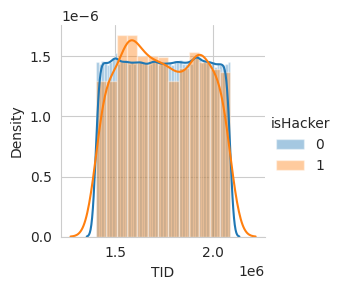

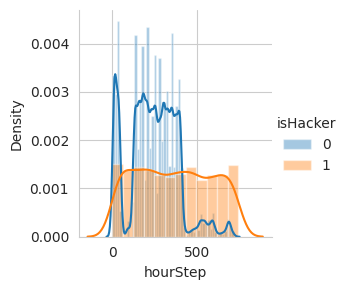

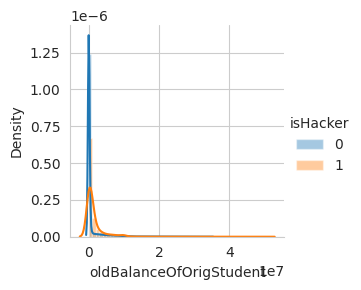

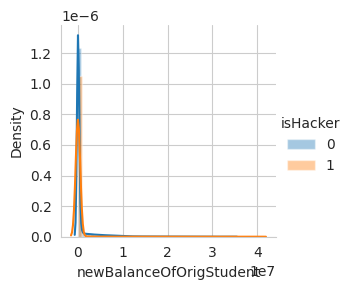

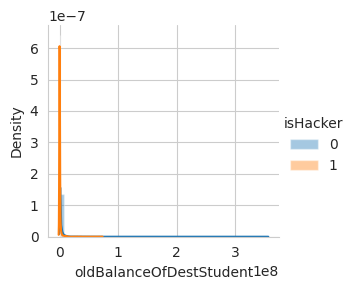

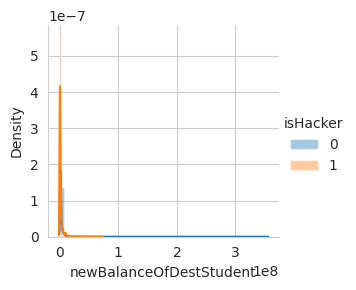

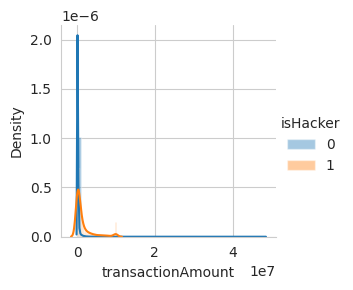

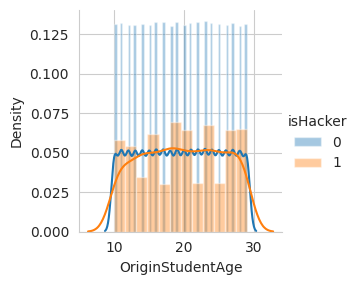

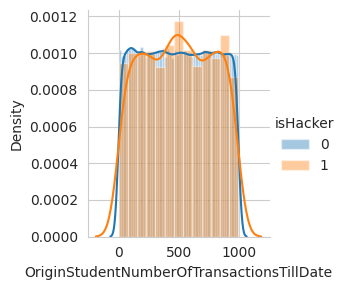

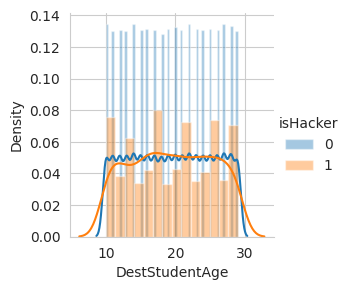

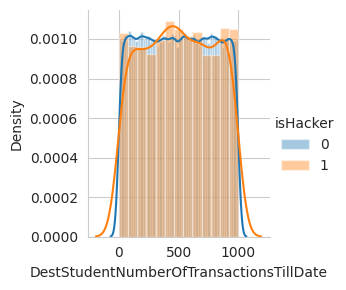

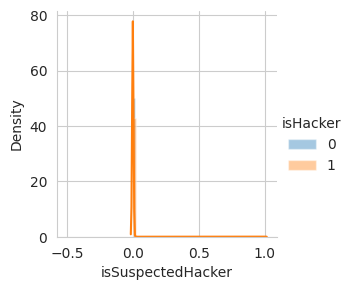

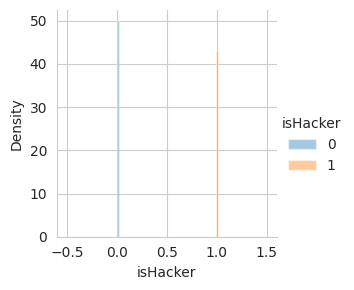

In [101]:
#Probabilty Density Function
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(1)
for column in  numerical_attributes.columns.tolist():
     g1=sn.FacetGrid(display,hue="isHacker")
     g1.map(sn.distplot,column)
     g1.add_legend()
     plt.show()



In [102]:
# Data-preprocessing: Standardizing the data
#We Use ordinal encoding for categorical variables that have a natural rank ordering.
#Also we use one-hot encoding for categorical variables that do not have a natural rank ordering.
#ordinal variable has values can be naturally ordered or ranked.
#The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.
#A one-hot encoding is appropriate for categorical data where no relationship exists between categories
#Ordinal encoding appropriate if there is a known relationship between the categories.
'''
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

data["transaction_device"]=labelencoder.fit_transform(data["transaction_device"])
data["comments"]=labelencoder.fit_transform(data["comments"])
data["IdOfOrigStudent"]=labelencoder.fit_transform(data["IdOfOrigStudent"])
data["IdOfDestStudent"]=labelencoder.fit_transform(data["IdOfDestStudent"])


#numeric_data=display.drop(['IdOfOrigStudent','IdOfDestStudent'],axis=1)

print(data.shape)
print(data.columns)
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nlabelencoder=LabelEncoder()\n\ndata["transaction_device"]=labelencoder.fit_transform(data["transaction_device"])\ndata["comments"]=labelencoder.fit_transform(data["comments"])\ndata["IdOfOrigStudent"]=labelencoder.fit_transform(data["IdOfOrigStudent"])\ndata["IdOfDestStudent"]=labelencoder.fit_transform(data["IdOfDestStudent"])\n\n\n#numeric_data=display.drop([\'IdOfOrigStudent\',\'IdOfDestStudent\'],axis=1)\n\nprint(data.shape)\nprint(data.columns)\n'

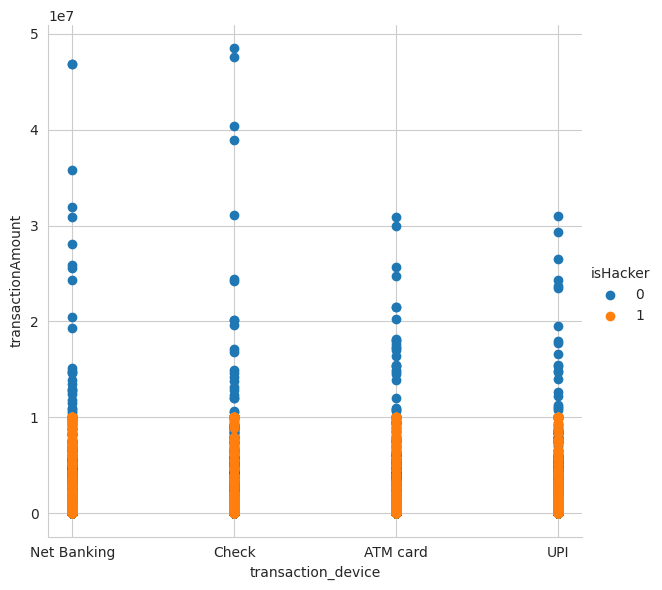

In [103]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn.
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_style("whitegrid");
sn.FacetGrid(display, hue="isHacker",height=3) \
   .map(plt.scatter, "transaction_device", "transactionAmount") \
   .add_legend();
plt.show();

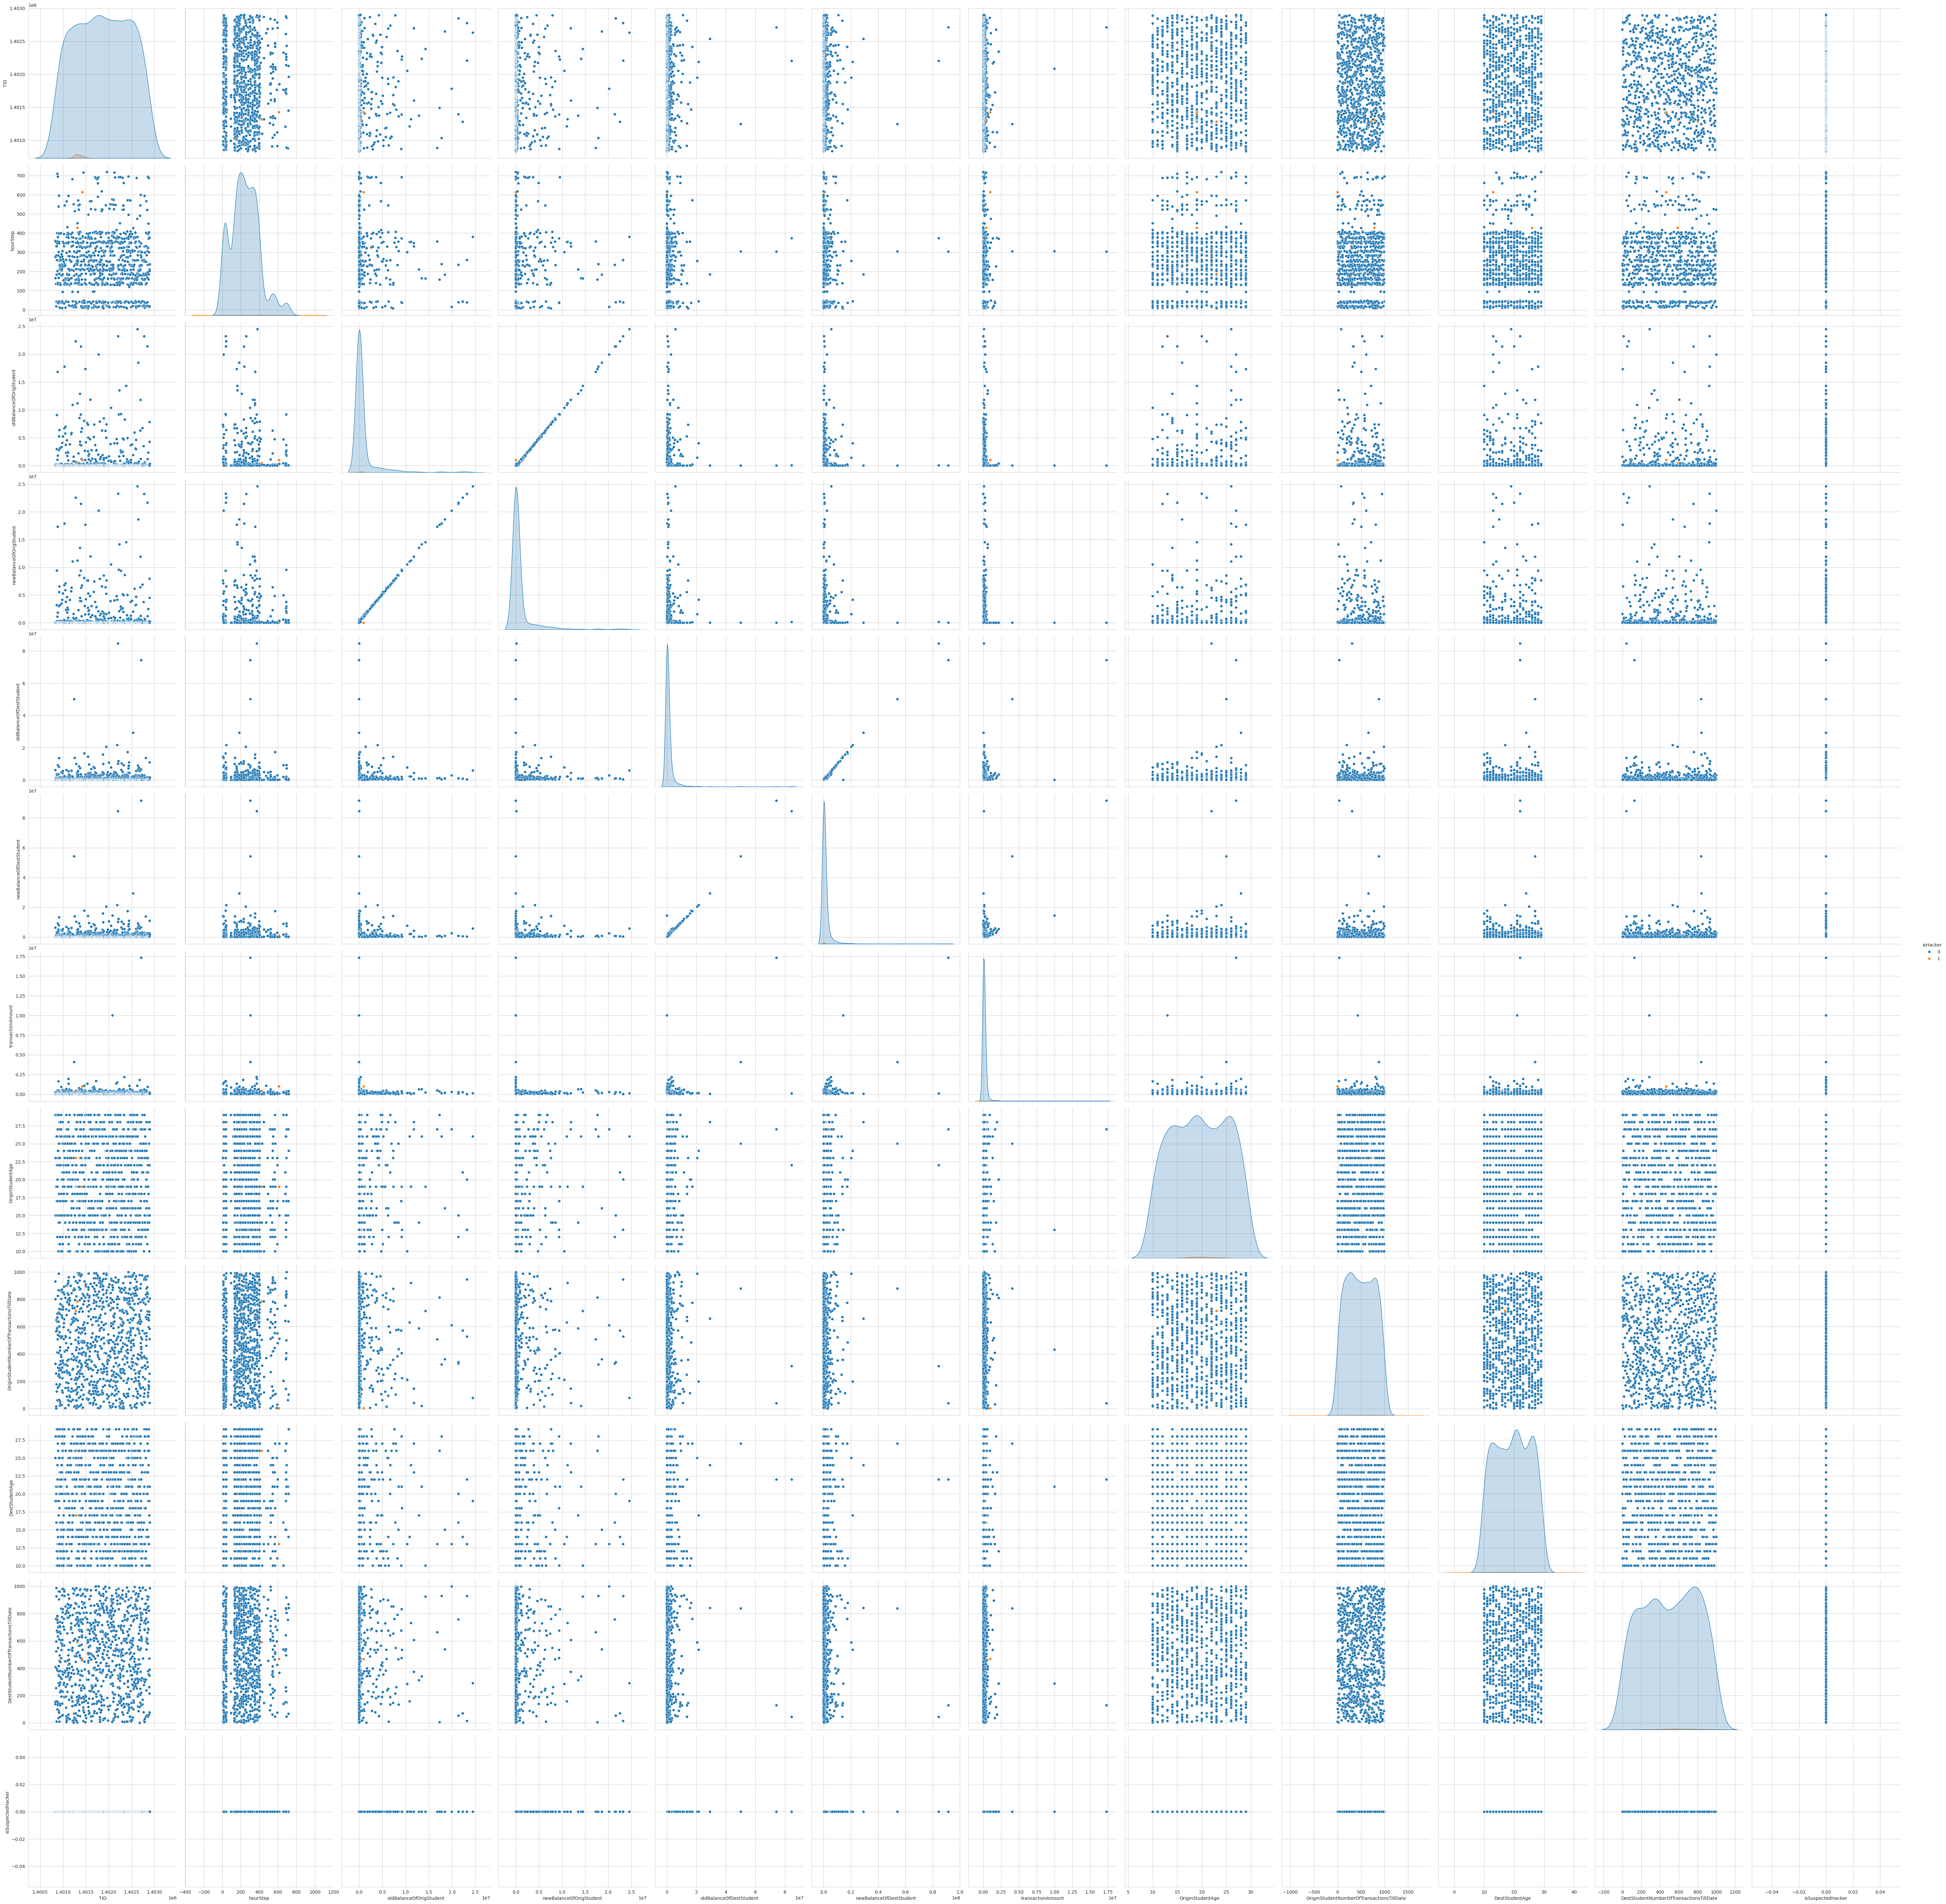

In [104]:
#Pair Plot #Takes lots of time to run
sn.set_style("whitegrid");
sn.pairplot(display.iloc[:1000,:], hue="isHacker", height=5);
plt.show()

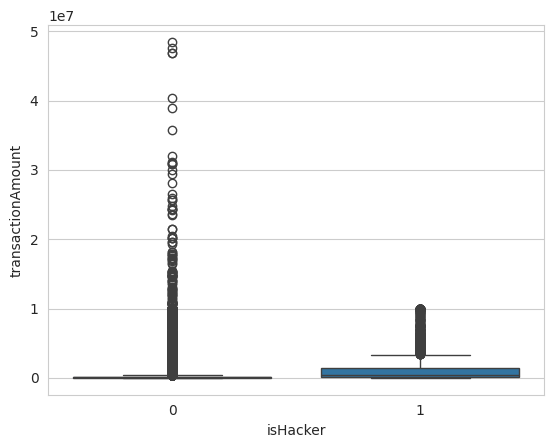

In [105]:
#Box-plot with whiskers: It is another method of visualizing the  1-D scatter plot more intuitivey.
sn.boxplot(x='isHacker',y='transactionAmount', data=display)
plt.show()


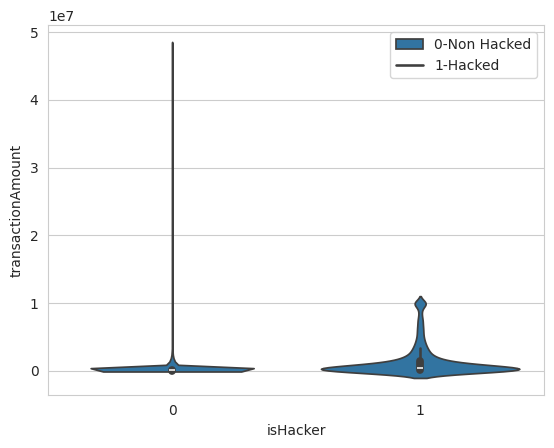

In [106]:
#In Violin Plot, Denser regions of the data are fatter, and sparser ones thinner
#Violin plot

sn.violinplot(x="isHacker", y="transactionAmount", data=display)
plt.legend(["0-Non Hacked","1-Hacked"])
plt.show()

0    335319
1      1871
Name: isHacker, dtype: int64


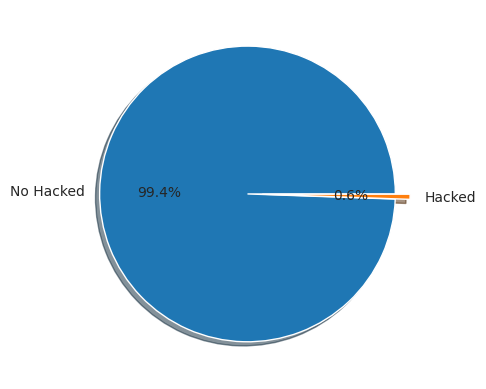

In [107]:
# value count
print(display.isHacker.value_counts())

# pie plot for the value count
plt.pie(display.isHacker.value_counts(),explode=[0.1, 0],
        labels=['No Hacked', 'Hacked'], shadow=True, autopct='%1.1f%%')
plt.show()

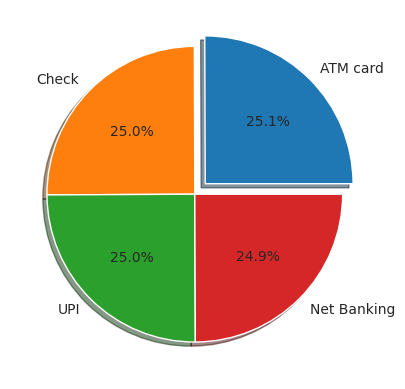

In [108]:
values = display['transaction_device'].value_counts().values
labels = display['transaction_device'].value_counts().keys()

plt.pie(values, labels=labels, explode=[0.1,0,0,0], shadow=True, autopct='%1.1f%%')
plt.show()

In [109]:
'''
# difference between initial balance before the transaction and new balance after the transaction for the Origin Student
data['balanceChangeOrig'] = data['newBalanceOfOrigStudent'] - data['oldBalanceOfOrigStudent']

# difference between initial balance before the transaction and new balance after the transaction for the Destination Student
data['balanceChangeDest'] = data['newBalanceOfDestStudent'] - data['oldBalanceOfDestStudent']
'''

"\n# difference between initial balance before the transaction and new balance after the transaction for the Origin Student\ndata['balanceChangeOrig'] = data['newBalanceOfOrigStudent'] - data['oldBalanceOfOrigStudent']\n\n# difference between initial balance before the transaction and new balance after the transaction for the Destination Student\ndata['balanceChangeDest'] = data['newBalanceOfDestStudent'] - data['oldBalanceOfDestStudent']\n"

In [110]:
"""
#Dropping some columns from the Dataframe since it does not add any valued information for prediction of fradulent transaction.
'''['TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'hourStep',
       'transaction_device', 'comments', 'oldBalanceOfOrigStudent',
       'newBalanceOfOrigStudent', 'oldBalanceOfDestStudent',
       'newBalanceOfDestStudent', 'transactionAmount', 'OriginStudentAge',
       'OriginStudentTransactionFrequency',
       'OriginStudentNumberOfTransactionsTillDate', 'OriginStudentAccountType',
       'DestStudentAge', 'DestStudentTransactionFrequency',
       'DestStudentNumberOfTransactionsTillDate', 'DestStudentAccountType',
       'isSuspectedHacker', 'isHacker']'''
data=data.drop(['oldBalanceOfOrigStudent','newBalanceOfOrigStudent','oldBalanceOfDestStudent','newBalanceOfDestStudent','TID','IdOfOrigStudent','IdOfDestStudent','hourStep'],axis=1)
Y=label

print(data.shape)
print(Y.shape)
print(data.columns)
"""

"\n#Dropping some columns from the Dataframe since it does not add any valued information for prediction of fradulent transaction.\n'''['TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'hourStep',\n       'transaction_device', 'comments', 'oldBalanceOfOrigStudent',\n       'newBalanceOfOrigStudent', 'oldBalanceOfDestStudent',\n       'newBalanceOfDestStudent', 'transactionAmount', 'OriginStudentAge',\n       'OriginStudentTransactionFrequency',\n       'OriginStudentNumberOfTransactionsTillDate', 'OriginStudentAccountType',\n       'DestStudentAge', 'DestStudentTransactionFrequency',\n       'DestStudentNumberOfTransactionsTillDate', 'DestStudentAccountType',\n       'isSuspectedHacker', 'isHacker']'''\ndata=data.drop(['oldBalanceOfOrigStudent','newBalanceOfOrigStudent','oldBalanceOfDestStudent','newBalanceOfDestStudent','TID','IdOfOrigStudent','IdOfDestStudent','hourStep'],axis=1)\nY=label\n\nprint(data.shape)\nprint(Y.shape)\nprint(data.columns)\n"

In [111]:
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

onehot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()
#X = onehot_encoder.fit_transform(X)
#t=onehot_encoder.fit_transform(X['transaction_device'].to_numpy().reshape(-1,1))
#X = pd.get_dummies(data, columns = ['transaction_device', 'comments','OriginStudentTransactionFrequency','OriginStudentAccountType','DestStudentTransactionFrequency','DestStudentAccountType'])
X = pd.get_dummies(data, columns = ['transaction_device', 'comments','OriginStudentAccountType','DestStudentAccountType'])
X["OriginStudentTransactionFrequency"]=ordinal_encoder.fit_transform(X["OriginStudentTransactionFrequency"].to_numpy().reshape(-1,1))
X["DestStudentTransactionFrequency"]=ordinal_encoder.fit_transform(X["DestStudentTransactionFrequency"].to_numpy().reshape(-1,1))


print(X.shape)
X
"""

'\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.preprocessing import OrdinalEncoder\n\nonehot_encoder = OneHotEncoder()\nordinal_encoder = OrdinalEncoder()\n#X = onehot_encoder.fit_transform(X)\n#t=onehot_encoder.fit_transform(X[\'transaction_device\'].to_numpy().reshape(-1,1))\n#X = pd.get_dummies(data, columns = [\'transaction_device\', \'comments\',\'OriginStudentTransactionFrequency\',\'OriginStudentAccountType\',\'DestStudentTransactionFrequency\',\'DestStudentAccountType\']) \nX = pd.get_dummies(data, columns = [\'transaction_device\', \'comments\',\'OriginStudentAccountType\',\'DestStudentAccountType\']) \nX["OriginStudentTransactionFrequency"]=ordinal_encoder.fit_transform(X["OriginStudentTransactionFrequency"].to_numpy().reshape(-1,1))\nX["DestStudentTransactionFrequency"]=ordinal_encoder.fit_transform(X["DestStudentTransactionFrequency"].to_numpy().reshape(-1,1))\n\n\nprint(X.shape)\nX\n'

In [112]:
#print(X.columns)

In [6]:
# TSNE for data visulization
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#X_15K=X.iloc[:50000]
#label_15K=label.iloc[:50000]

#standardized_data = StandardScaler().fit_transform(X_15K)
#print(standardized_data.shape)
#print(label_15K.shape)
#print(label_1000.columns)
def t_SNE(X,Y):
 model = TSNE(n_components=2,random_state=0,perplexity=2,n_iter=1000)
 # configuring the parameteres
 # the number of components = 2
 # default perplexity = 30
 # default learning rate = 200
 # default Maximum number of iterations for the optimization = 1000

 tsne_data = model.fit_transform(X)

 # creating a new data frame which help us in ploting the result data

 tsne_data = np.hstack((tsne_data, Y))

 tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "isHacker"))

 # Ploting the result of tsne
 sn.FacetGrid(tsne_df,hue="isHacker", height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 plt.show()

In [7]:
#Unprocessed_Hacker_Rank Dataset
Validation_Dataset=pd.read_sql_query("""
SELECT Transactions.TID,IdOfOrigStudent,IdOfDestStudent,hourStep,transaction_device,comments,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,oldBalanceOfDestStudent,newBalanceOfDestStudent,receiver.transactionAmount ,OrigStud.StudentAge as OriginStudentAge,OrigStud.TransactionFrequency as OriginStudentTransactionFrequency,OrigStud.NumberOfTransactionsTillDate as OriginStudentNumberOfTransactionsTillDate,OrigStud.AccountType as OriginStudentAccountType,DestStud.StudentAge as DestStudentAge,DestStud.TransactionFrequency as DestStudentTransactionFrequency,DestStud.NumberOfTransactionsTillDate as DestStudentNumberOfTransactionsTillDate,DestStud.AccountType as DestStudentAccountType,isSuspectedHacker
FROM Transactions
JOIN sender on sender.TID=Transactions.TID
JOIN receiver on receiver.TID=Transactions.TID
JOIN Unprocessed_Hacker_Check on Unprocessed_Hacker_Check.TID=Transactions.TID
JOIN Students as OrigStud on OrigStud.StudentId=Transactions.IdOfOrigStudent
JOIN Students as DestStud on DestStud.StudentId=Transactions.IdOfDestStudent
ORDER BY Transactions.TID""", connection)

Validation_Dataset

TID IdOfOrigStudent IdOfDestStudent  hourStep transaction_device  \
0       2090149     C1424432191      C423733860       158                UPI   
1       2090154     C1091117724      C477109299        18           ATM card   
2       2090156      C237215054      C903990962       205              Check   
3       2090158      C255394834     M1927258097       383        Net Banking   
4       2090160      C230971887       M23752348       595                UPI   
...         ...             ...             ...       ...                ...   
225144  2549755      C511184371     C2118443512       327           ATM card   
225145  2549757     C2142339328     C1142371610        36           ATM card   
225146  2549758      C842032682      M233089391       397                UPI   
225147  2549760     C1081829191      C476441699        22        Net Banking   
225148  2549761     C1300970010      C456454339       185        Net Banking   

                   comments  oldBalanceOfOrigStudent  newBalanceOfOrigStudent  \
0                    drinks                 21281.00                     0.00   
1                    dinner                  8004.00                     0.00   
2                     lunch                     0.00                     0.00   
3                  eatables                     0.00                     0.00   
4                     lunch                     0.00                     0.00   
...                     ...                      ...                      ...   
225144  Purchased groceries                 14828.00                     0.00   
225145                 food                   559.00                 42777.04   
225146                 food                 15875.89                  3539.35   
225147               dinner                     0.00                     0.00   
225148              betting              20608072.16              20852142.01   

        oldBalanceOfDestStudent  newBalanceOfDestStudent  transactionAmount  \
0                          0.00                242460.07          242460.07   
1                     200242.42                151342.83          121646.09   
2                     234423.72                341572.83          107149.11   
3                          0.00                     0.00            5202.76   
4                          0.00                     0.00           18817.60   
...                         ...                      ...                ...   
225144                     0.00                 48035.71           48035.71   
225145               1535564.25               1493346.21           42218.04   
225146                     0.00                     0.00           12336.53   
225147               4884935.04               5226913.97          341978.94   
225148                247703.91                  3634.06          244069.85   

        OriginStudentAge OriginStudentTransactionFrequency  \
0                     23                              HIGH   
1                     14                               LOW   
2                     22                            MEDIUM   
3                     22                            MEDIUM   
4                     27                              HIGH   
...                  ...                               ...   
225144                15                              HIGH   
225145                27                               LOW   
225146                10                               LOW   
225147                11                            MEDIUM   
225148                19                               LOW   

        OriginStudentNumberOfTransactionsTillDate OriginStudentAccountType  \
0                                             876               INDIVIDUAL   
1                                             875               INDIVIDUAL   
2                                             110             JOINT/SHARED   
3                                             334             JOINT/SHAR

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *


def pre_processing(data):
  # difference between initial balance before the transaction and new balance after the transaction for the Origin Student
  data['balanceChangeOrig'] = data['newBalanceOfOrigStudent'] - data['oldBalanceOfOrigStudent']

  # difference between initial balance before the transaction and new balance after the transaction for the Destination Student
  data['balanceChangeDest'] = data['newBalanceOfDestStudent'] - data['oldBalanceOfDestStudent']

  data=data.drop(['oldBalanceOfOrigStudent','newBalanceOfOrigStudent','oldBalanceOfDestStudent','newBalanceOfDestStudent','TID','IdOfOrigStudent','IdOfDestStudent','hourStep'],axis=1)

  onehot_encoder = OneHotEncoder()
  ordinal_encoder = OrdinalEncoder()

  data = pd.get_dummies(data, columns = ['transaction_device', 'comments','OriginStudentAccountType','DestStudentAccountType'])
  data["OriginStudentTransactionFrequency"]=ordinal_encoder.fit_transform(data["OriginStudentTransactionFrequency"].to_numpy().reshape(-1,1))
  data["DestStudentTransactionFrequency"]=ordinal_encoder.fit_transform(data["DestStudentTransactionFrequency"].to_numpy().reshape(-1,1))
  final_columns=data.columns
  scaler = StandardScaler()
  #scaler=MinMaxScaler()
  data = scaler.fit_transform(data)

  return data,final_columns

Y=label

TrainingSet_X,col=pre_processing(data)
ValidationSet,col=pre_processing(Validation_Dataset)
print(TrainingSet_X.shape)
print(Y.shape)

(337190, 31)
(337190, 1)


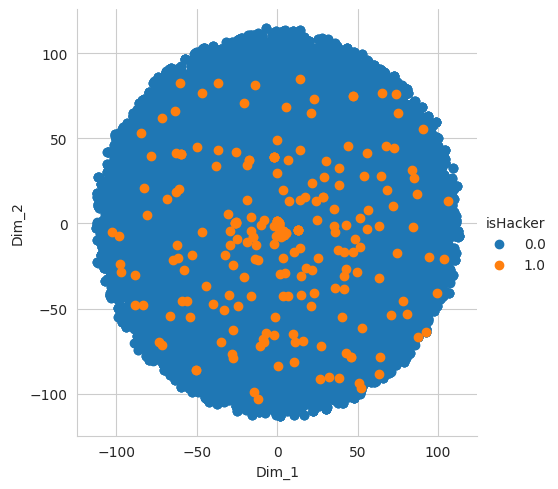

In [134]:
#Printing t_SNE Plot for Multivariate analysis of distribution of data
t_SNE(TrainingSet_X[:50000],Y[:50000])

<ipython-input-12-31c3fe43fa70>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.join(label).corr()


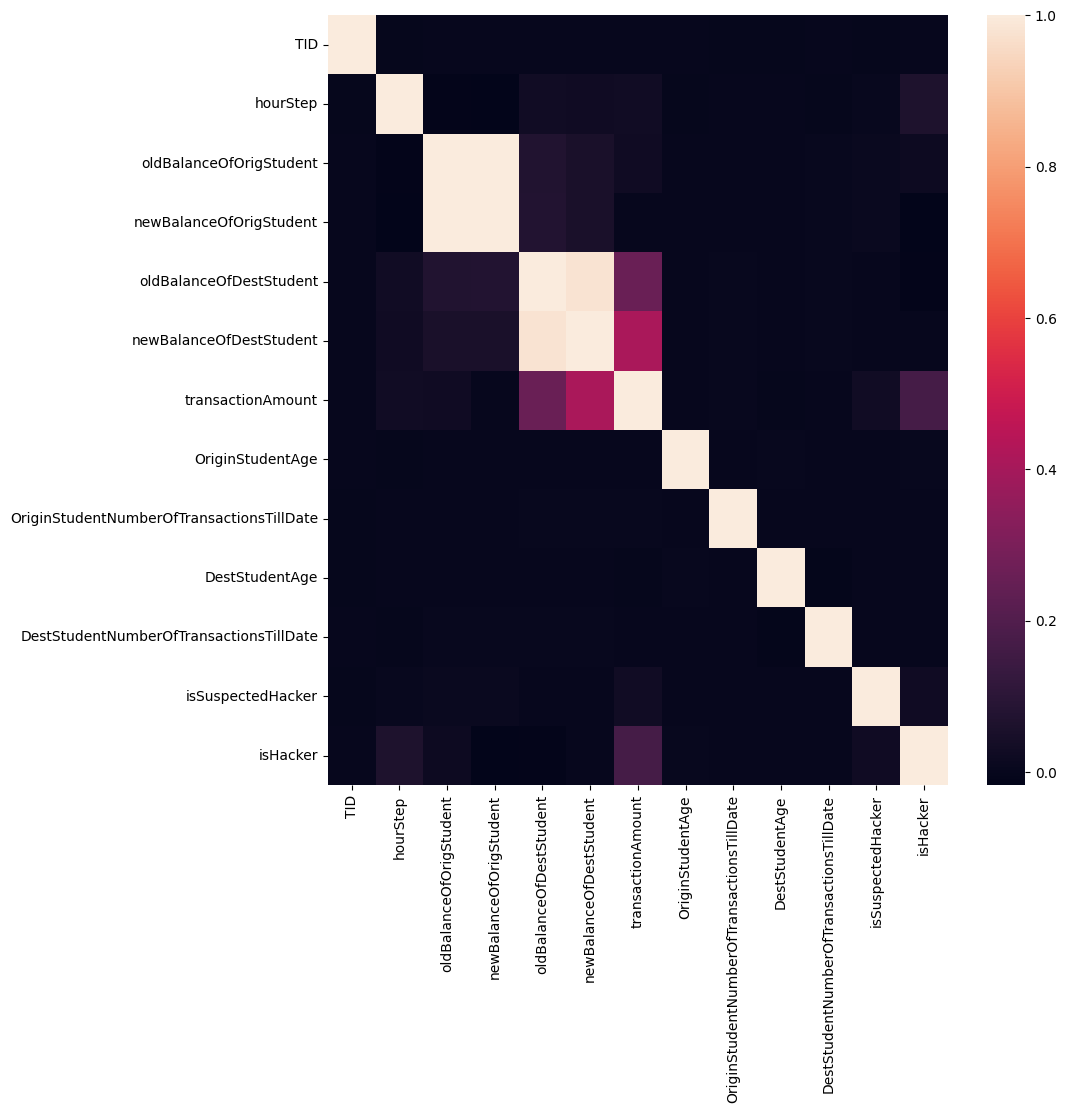

In [12]:
correlation_matrix = data.join(label).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sn.heatmap(correlation_matrix, annot=False)
plt.show()

In [9]:
#from sklearn.metrics import balanced_accuracy_score, precision_score, classification_report,recall_score, f1_score
#from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,auc
from sklearn.metrics import *
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def performance_metrics(model_name,y_true,y_pred,modelObj):

  print("\n******************************Performance Metrics on Test Data******************************\n")
  print(classification_report(y_true, y_pred))
  print("******************************************************************************************\n")
  accuracy = balanced_accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  data=pd.DataFrame({'Balanced Accuracy':accuracy ,'Precision':precision ,'Recall':recall ,'F1':f1 },index=[model_name])
  print(data)
  print("******************************************************************************************\n")
  cm = confusion_matrix(y_true, y_pred)
  ConfusionMatrixDisplay(cm, display_labels=modelObj.classes_).plot()
  plt.title("Confusion Matrix")
  plt.show()
  print("******************************************************************************************\n")
  precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
  plt.plot(recall, precision, marker='.')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title("Area under the precision recall curve")
  plt.legend()
  plt.show()
  print("******************************************************************************************\n")
  print("Area under the precision recall curve {}".format(auc(recall, precision)))




In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

# spliting into temp and test
X_temp, X_test, y_temp, y_test = train_test_split(TrainingSet_X, Y, test_size=0.20, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)


In [11]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

def cross_validation(model_name,model, x, y ):
  balanced_accuracies = []
  precisions = []
  recalls = []
  f1s = []
  count=0

  '''cross-validation'''
  skf = StratifiedKFold(n_splits=12, shuffle=True)
  #y_pred,y_test=0,0
  for index_train, index_test in skf.split(x, y):

    ## selecting train and test
    x_train, x_test = x.iloc[index_train], x.iloc[index_test]
    y_train, y_test = y.iloc[index_train], y.iloc[index_test]

    ## training the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    ## saving the metrics
    balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))


  #performance_metrics(model_name,y_test,y_pred,model)
  print("\n******************************************************************************************\n")
  accuracy_mean, accuracy_std = np.round(np.mean(balanced_accuracies),2),np.round(np.std(balanced_accuracies),2)
  precision_mean, precision_std = np.round(np.mean(precisions),2),np.round(np.std(precisions),2)
  recall_mean, recall_std = np.round(np.mean(recalls),2),np.round(np.std(recalls),2)
  f1_mean, f1_std = np.round(np.mean(f1s),2),np.round(np.std(f1s),2)

  print(pd.DataFrame({"BalancedAccuracy": "{}+/-{}".format(accuracy_mean, accuracy_std),"Precision": "{}+/-{}".format(precision_mean, precision_std),"Recall": "{}+/-{}".format(recall_mean, recall_std),"F1": "{}+/-{}".format(f1_mean, f1_std)},index=[model_name]))



******************************************************************************************

                       BalancedAccuracy    Precision      Recall           F1
DecisionTreeClassifier       0.8+/-0.03  0.93+/-0.03  0.6+/-0.05  0.73+/-0.04

******************************Performance Metrics on Test Data******************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67072
           1       0.88      0.60      0.71       366

    accuracy                           1.00     67438
   macro avg       0.94      0.80      0.86     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                        Balanced Accuracy  Precision    Recall        F1
DecisionTreeClassifier           0.798957   0.879518  0.598361  0.712195
******************************************************************************************


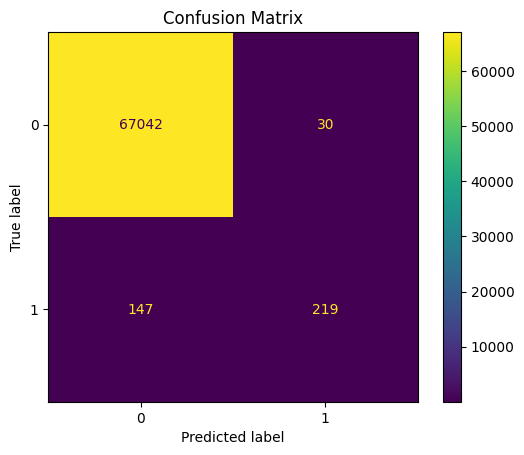

******************************************************************************************



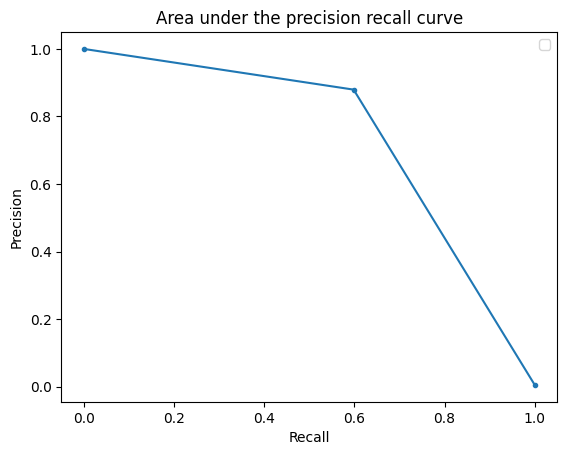

******************************************************************************************

Area under the precision recall curve 0.7400292539864429


In [33]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=10,min_samples_split=100)
dt_model.fit(X_train, y_train)


Descision_Tree=cross_validation('DecisionTreeClassifier',dt_model,pd.DataFrame(X_temp), pd.DataFrame(y_temp))

# Predictions on test set
dt_preds = dt_model.predict(X_test)

# Classification report for Decision Tree model
performance_metrics("DecisionTreeClassifier",y_test,dt_preds,dt_model)



******************************************************************************************

                     BalancedAccuracy    Precision      Recall           F1
KNeighborsClassifier      0.65+/-0.01  0.99+/-0.02  0.3+/-0.02  0.46+/-0.03

******************************Performance Metrics on Test Data******************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67072
           1       0.94      0.28      0.43       366

    accuracy                           1.00     67438
   macro avg       0.97      0.64      0.72     67438
weighted avg       1.00      1.00      0.99     67438

******************************************************************************************

                      Balanced Accuracy  Precision    Recall        F1
KNeighborsClassifier           0.640658   0.936364  0.281421  0.432773
******************************************************************************************



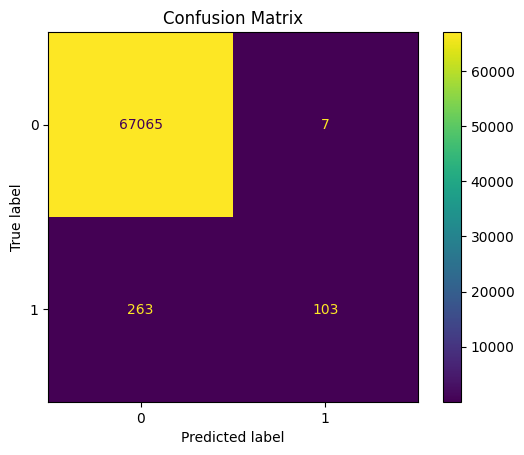

******************************************************************************************



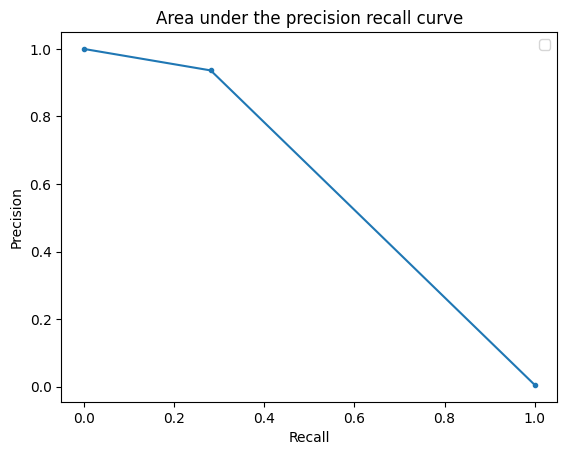

******************************************************************************************

Area under the precision recall curve 0.6108421398988959


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10,weights='uniform')
knn.fit(X_train, y_train)


KNN_Classifier=cross_validation('KNeighborsClassifier',knn,pd.DataFrame(X_temp), pd.DataFrame(y_temp))

y_pred = knn.predict(X_test)
performance_metrics("KNeighborsClassifier",y_test,y_pred,knn)


In [ ]:
from sklearn.svm  import SVC

svm = SVC(gamma='scale',class_weight="balanced",C=100) #Here C controls tradeoff between smoothed decision boundry & classifying training points correctly.
svm.fit(X_train, y_train)


SVC=cross_validation('Support Vector',svm,pd.DataFrame(X_temp), pd.DataFrame(y_temp))

y_pred = svm.predict(X_test)
performance_metrics("Support Vector Machine",y_test,y_pred,svm)


******************************************************************************************

                    BalancedAccuracy    Precision       Recall           F1
Logistic Regression      0.92+/-0.02  0.14+/-0.01  0.88+/-0.04  0.23+/-0.01

******************************Performance Metrics on Test Data******************************

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     67072
           1       0.13      0.88      0.23       366

    accuracy                           0.97     67438
   macro avg       0.57      0.93      0.61     67438
weighted avg       0.99      0.97      0.98     67438

******************************************************************************************

                     Balanced Accuracy  Precision    Recall        F1
Logistic Regression           0.925408   0.131891  0.882514  0.229485
******************************************************************************************



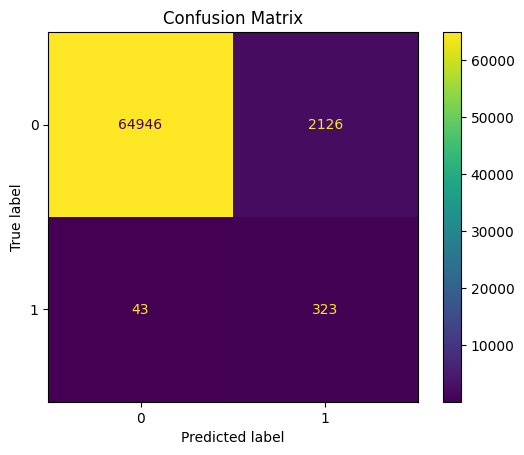

******************************************************************************************



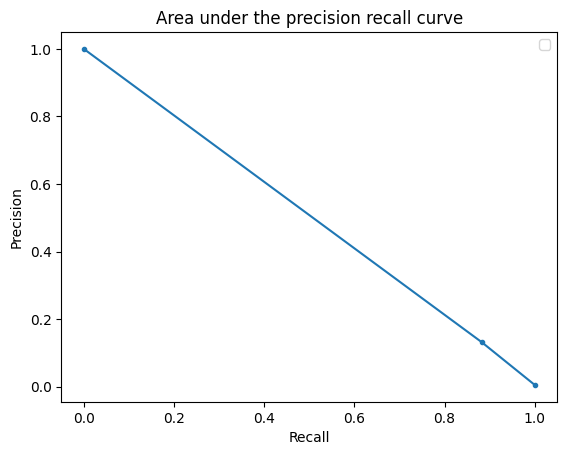

******************************************************************************************

Area under the precision recall curve 0.5075209257430444


In [21]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
model = LogisticRegression(C=10,max_iter=1000,class_weight="balanced",solver='lbfgs')
model.fit(X_train, y_train)

'''
#Finding Optimal Value for K(No.of Splits)
for k in range(30,51):
 Logistic_regression=cross_validation('Logistic Regression',model,pd.DataFrame(X_temp), pd.DataFrame(y_temp),k)
'''
Logistic_regression=cross_validation('Logistic Regression',model,pd.DataFrame(X_temp), pd.DataFrame(y_temp))
#print(Logistic_regression)

y_pred = model.predict(X_test)
performance_metrics("Logistic Regression",y_test,y_pred,model)

In [125]:
#y_pred = model.predict(X_test)
#performance_metrics("Logistic Regression",y_test,y_pred,model)

In [126]:
#from sklearn.metrics import classification_report


# Predictions on test set for Logistic Regression

# Classification report for Logistic Regression model
#logistic_report = classification_report(y_test, logistic_preds)
##print("Logistic Regression Classification Report:")
#print(logistic_report)

     1)Accuracy provides the proportion of correctly classified
      instances.
     2)Precision: Precision focuses on the accuracy of positive
      predictions made by the model.{{TP / (TP + FP)} }
     3)Recall measures the ratio of No.of times model correctly
     predicted positive instances among all actual positive instances. {TP / (TP + FN)} --> True Positive Rate/Sensitivity --> It describes how good the model is at predicting the positive class when the actual outcome is positive.
     4)F1 score is the harmonic mean of precision & recall.
     5)ROC Curve is False Positive Rate(false alarm rate) vs True Positive Rate(hit rate)
     6)False Positive Rate = {FP/ (FP+TN)} --> It describes how often a positive class is predicted when the actual outcome is negative.
     7)ROC Graph Summarizes all of the confusion matrices that each threshold produces.It makes easy to identify best threshold.
     Higher the AUROC ,better the model is.
     8)A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds



******************************************************************************************

        BalancedAccuracy    Precision       Recall           F1
XGBoost      0.78+/-0.01  0.85+/-0.05  0.56+/-0.03  0.67+/-0.02

******************************Performance Metrics on Test Data******************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67072
           1       0.86      0.55      0.67       366

    accuracy                           1.00     67438
   macro avg       0.93      0.77      0.83     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

         Balanced Accuracy  Precision   Recall        F1
XGBoost           0.774337   0.855319  0.54918  0.668885
******************************************************************************************



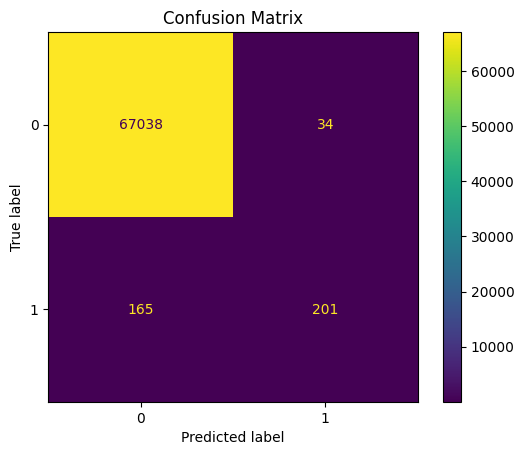

******************************************************************************************



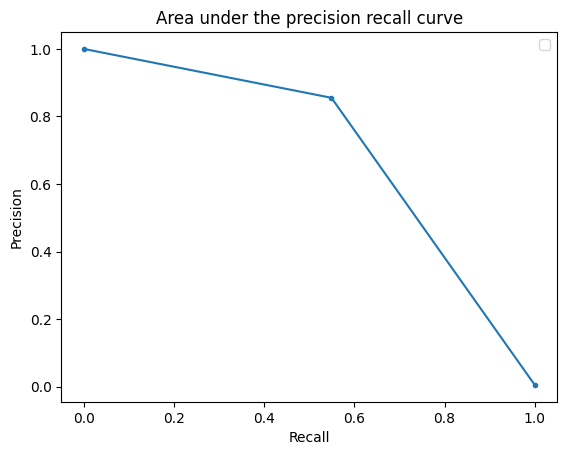

******************************************************************************************

Area under the precision recall curve 0.7034730842905863


In [25]:
import xgboost as xgb
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(colsample_bytree=1.0, gamma= 0.0, learning_rate= 0.1, max_depth= 10, n_estimators= 100)
xgb_model.fit(X_train, y_train)

XGBoost_Model=cross_validation('XGBoost',xgb_model,pd.DataFrame(X_temp), pd.DataFrame(y_temp))

xgb_preds = xgb_model.predict(X_test)

performance_metrics("XGBoost",y_test,xgb_preds,xgb_model)


******************************************************************************************

             BalancedAccuracy    Precision      Recall           F1
RandomForest       0.6+/-0.02  0.99+/-0.02  0.2+/-0.04  0.33+/-0.05

******************************Performance Metrics on Test Data******************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67072
           1       1.00      0.15      0.27       366

    accuracy                           1.00     67438
   macro avg       1.00      0.58      0.63     67438
weighted avg       1.00      1.00      0.99     67438

******************************************************************************************

                        Balanced Accuracy  Precision    Recall        F1
RandomForestClassifier           0.576503        1.0  0.153005  0.265403
******************************************************************************************



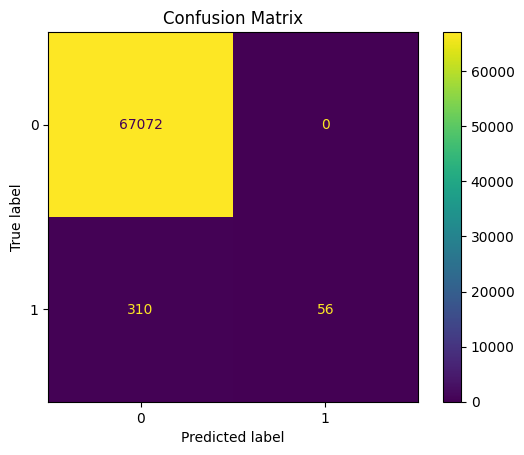

******************************************************************************************



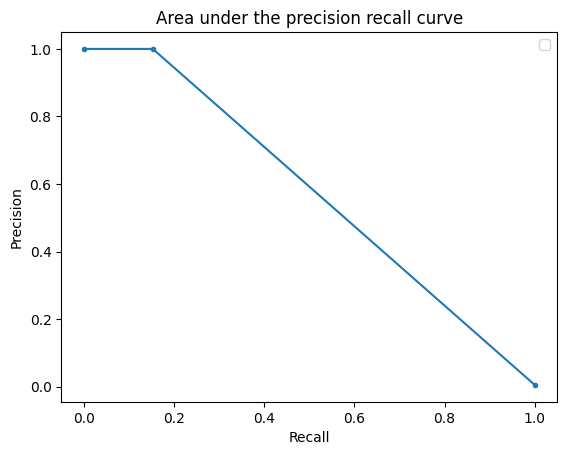

******************************************************************************************

Area under the precision recall curve 0.5788011396665174


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='log_loss', max_depth=15,min_samples_leaf=10, min_samples_split=100,n_estimators=1000)
rf.fit(X_train, y_train)

RandomForest_Model=cross_validation('RandomForest',rf,pd.DataFrame(X_temp), pd.DataFrame(y_temp))

y_pred = rf.predict(X_test)
performance_metrics("RandomForestClassifier",y_test,y_pred,rf)


******************************************************************************************

                           BalancedAccuracy    Precision       Recall  \
GradientBoostingClassifier      0.86+/-0.02  0.99+/-0.01  0.73+/-0.04   

                                     F1  
GradientBoostingClassifier  0.84+/-0.03  

******************************Performance Metrics on Test Data******************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67072
           1       0.91      0.58      0.71       366

    accuracy                           1.00     67438
   macro avg       0.95      0.79      0.85     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                  Balanced Accuracy  Precision    Recall        F1
GradientBoosting           0.792186    0.90678  0.584699  0.710963
****************************

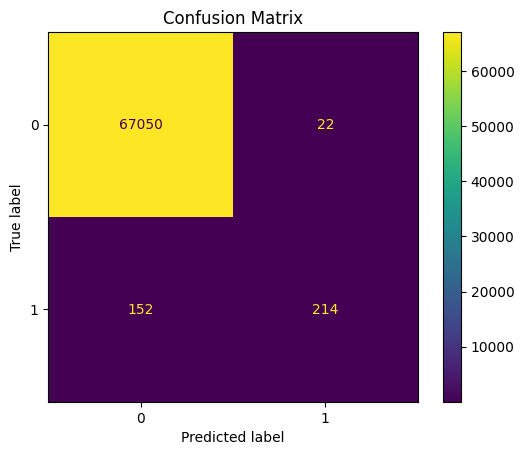

******************************************************************************************



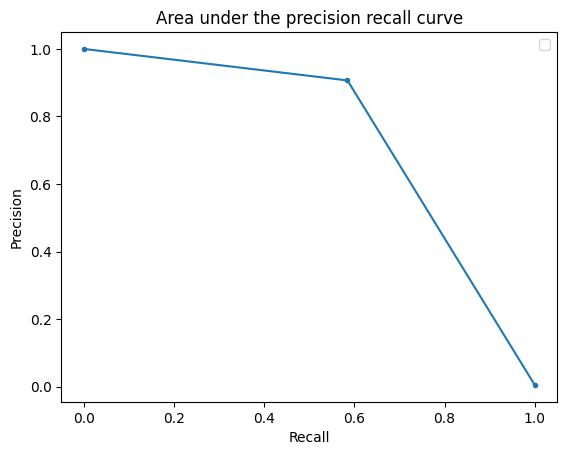

******************************************************************************************

Area under the precision recall curve 0.7468665183449605


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gbm_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,warm_start=True)
gbm_model.fit(X_train, y_train)

GradientBoosting_Model=cross_validation('GradientBoosting',gbm_model,pd.DataFrame(X_temp), pd.DataFrame(y_temp))

# Predictions on test set
gbm_preds = gbm_model.predict(X_test)

performance_metrics("GradientBoosting",y_test,gbm_preds,gbm_model)

In [31]:
feature_importances = gbm_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': col,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

                                      Feature  Importance
8                           balanceChangeOrig    0.830880
9                           balanceChangeDest    0.095549
0                           transactionAmount    0.058888
6     DestStudentNumberOfTransactionsTillDate    0.003584
3   OriginStudentNumberOfTransactionsTillDate    0.003442
4                              DestStudentAge    0.001562
1                            OriginStudentAge    0.001307
2           OriginStudentTransactionFrequency    0.000467
5             DestStudentTransactionFrequency    0.000409
11                   transaction_device_Check    0.000258
21                              comments_food    0.000246
15               comments_Purchased groceries    0.000243
17                         comments_breakfast    0.000231
13                     transaction_device_UPI    0.000227
22                      comments_laundry rent    0.000202
16                           comments_betting    0.000191
20            

In [131]:
#A general function for grdi search
from sklearn.model_selection import GridSearchCV

def grid_src(classifier, param_grid):
    param_grid=param_grid
    # instantiate the tuned random forest
    grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1)

    # train the tuned random forest
    grid_search.fit(TrainingSet_X, Y)

    # print best estimator parameters found during the grid search
    print((str(classifier) + 'Best Parameters'))
    print("------------------------")
    print(grid_search.best_params_)
    return grid_search.best_params_

In [132]:
param_grid_rf = {'n_estimators': [1500, 1800, 100,1000],
                  'max_depth': [9, 3, 6, 12],
                  'min_samples_split': [1200, 2, 50],
                  'max_features':[7,4,10],
                  'min_samples_leaf':[60,100,10,2]
                 }

#rf_params=grid_src(GradientBoostingClassifier(),param_grid_rf)

In [133]:
Target=pd.DataFrame(gbm_model.predict(ValidationSet),columns=["isHackerProbability"])

Unprocessed_Hacker_Check=Validation_Dataset.filter(['TID'],axis=1)

results=Unprocessed_Hacker_Check.join(Target)
#gbm_model.predict_proba(ValidationSet) --> probabilities of each class.Instead The predict() method returns the predicted class labels
results.to_csv("result.csv",index=False)

print(results)

            TID  isHackerProbability
0       2090149                    0
1       2090154                    0
2       2090156                    0
3       2090158                    0
4       2090160                    0
...         ...                  ...
225144  2549755                    0
225145  2549757                    0
225146  2549758                    0
225147  2549760                    0
225148  2549761                    0

[225149 rows x 2 columns]


In [34]:
from sklearn.ensemble import VotingClassifier

vot_hard = VotingClassifier( estimators=[("DT", dt_model), ("KNN", knn),("LR",model),("XG",xgb_model),("RF",rf),("GB",gbm_model)],voting='hard')

vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)


******************************Performance Metrics on Test Data******************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67072
           1       0.94      0.52      0.67       366

    accuracy                           1.00     67438
   macro avg       0.97      0.76      0.83     67438
weighted avg       1.00      1.00      1.00     67438

******************************************************************************************

                  Balanced Accuracy  Precision    Recall        F1
VotingClassifier           0.760832   0.936275  0.521858  0.670175
******************************************************************************************



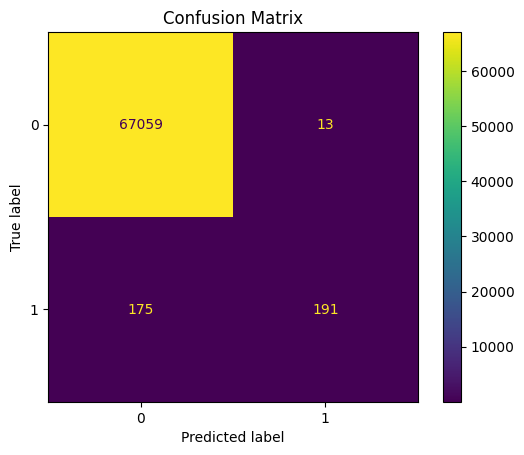

******************************************************************************************



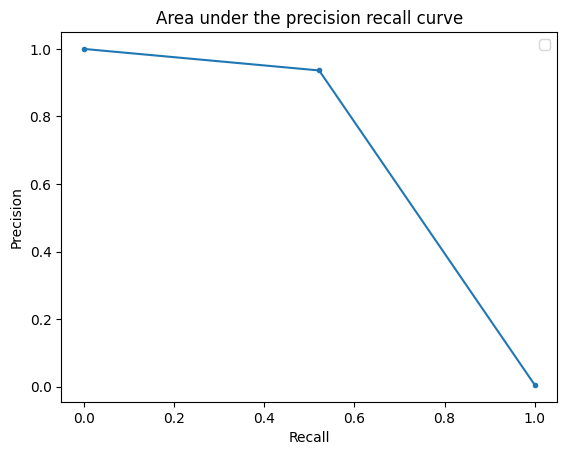

******************************************************************************************

Area under the precision recall curve 0.7303637047137044


In [35]:
performance_metrics("VotingClassifier",y_test,y_pred,vot_hard)

In [36]:
Target=pd.DataFrame(vot_hard.predict(ValidationSet),columns=["isHackerProbability"])

Unprocessed_Hacker_Check=Validation_Dataset.filter(['TID'],axis=1)

results=Unprocessed_Hacker_Check.join(Target)
#gbm_model.predict_proba(ValidationSet) --> probabilities of each class.Instead The predict() method returns the predicted class labels
results.to_csv("result.csv",index=False)

print(results)

            TID  isHackerProbability
0       2090149                    0
1       2090154                    0
2       2090156                    0
3       2090158                    0
4       2090160                    0
...         ...                  ...
225144  2549755                    0
225145  2549757                    0
225146  2549758                    0
225147  2549760                    0
225148  2549761                    0

[225149 rows x 2 columns]
